In [25]:
import swan_vis as swan

In [26]:
annot = 'gencode.v40.annotation.encode_pilot_regions.gtf'
gtf = 'h1_talon.gtf'
ab = 'h1_talon_abundance.tsv'

sg = swan.SwanGraph()
sg.add_annotation(annot)
sg.add_transcriptome(gtf)
sg.add_abundance(ab)



Adding annotation to the SwanGraph

Adding transcriptome to the SwanGraph

Adding abundance for datasets h1_de_1, h1_de_2, h1_de_3, h1_1, h1_2... (and 1 more) to SwanGraph
Calculating transcript TPM...
Calculating PI...
Calculating edge usage...


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Calculating TSS usage...
Calculating TES usage...


In [27]:
sg.save_graph('swan')

Saving graph as swan.p


In [28]:
# add metadata
sg.adata.obs.head()
meta = sg.adata.obs.copy(deep=True)
meta['cell_type'] = meta.dataset.str.rsplit('_', n=1, expand=True)[0]

meta = meta[['dataset', 'cell_type']]
meta.to_csv('swan_metadata.tsv', sep='\t', index=False)
meta = 'swan_metadata.tsv'
sg.add_metadata(meta)

# add colors for h1 and h1_de
c_dict = {'h1': 'darkorchid', 'h1_de': 'darkgoldenrod'}
sg.set_metadata_colors('cell_type', c_dict)

sg.save_graph('swan')

Saving graph as swan.p


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [29]:
# intron retention and exon skipping
es_df = sg.find_es_genes(verbose=False)
ir_df = sg.find_ir_genes(verbose=False)

Analyzing 43 intronic edges for ES
Found 10 novel es events in 5 transcripts.
Analyzing 73 exonic edges for IR
Found 1 novel ir events in 1 transcripts.


In [7]:
ir_df.head()

,gid,tid,edge_id
0,ENSG00000203879.12,ENCODEHT000013757,22038


In [10]:
ir_tid = ir_df.tid.tolist()[0]
ir_gid = ir_df.gid.tolist()[0]

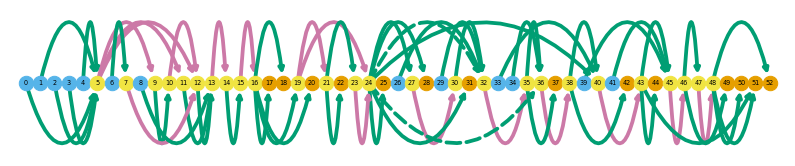

In [11]:
# inspect a gene with IR and ES
sg.plot_graph(ir_gid, indicate_novel=True)

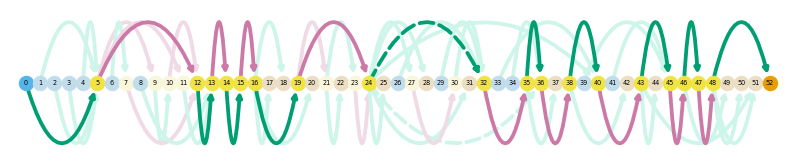

In [12]:
sg.plot_transcript_path(ir_tid, indicate_novel=True)

In [13]:
es_df.head()

,gid,tid,edge_id
0,ENSG00000143398.20,ENCODEHT000005436,21998
0,ENSG00000143398.20,ENCODEHT000005436,21998
0,ENSG00000143398.20,ENCODEHT000005436,21998
0,ENSG00000159352.16,ENCODEHT000006061,22000
0,ENSG00000088205.13,ENCODEHT000006136,22002


In [14]:
es_gid = es_df.gid.tolist()[0]
es_tid = es_df.tid.tolist()[0]

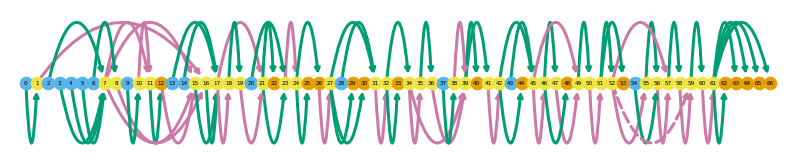

In [15]:
sg.plot_graph(es_gid, indicate_novel=True)

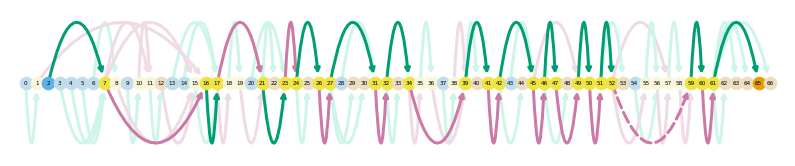

In [16]:
sg.plot_transcript_path(es_tid, indicate_novel=True)

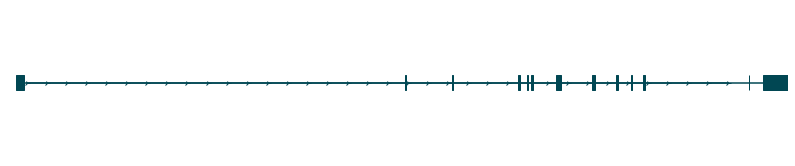

In [17]:
sg.plot_transcript_path(es_tid, browser=True)

In [30]:
# differential expression tests
sg = swan.read('swan.p')

obs_col = 'cell_type'
degs = sg.de_gene_test(obs_col)

Read in graph from swan.p


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'impl_ret_borrowed' requested from: 'numba.targets.imputils', pleas

training location model: False
training scale model: True
iter   0: ll=81219.277001
iter   1: ll=81219.277001, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=13103.291738, converged: 0.00% (loc: 0.00%, scale update: True), in 3.04sec
iter   3: ll=13103.291738, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=13103.291738, converged: 100.00% (loc: 100.00%, scale update: True), in 0.65sec


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/dask/array/core.py:2622: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [3]:
dets = sg.de_transcript_test(obs_col)

training location model: False
training scale model: True
iter   0: ll=313081.720267
iter   1: ll=313081.720267, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=32267.643576, converged: 0.00% (loc: 0.00%, scale update: True), in 1.28sec
iter   3: ll=32267.643576, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=32267.643575, converged: 100.00% (loc: 100.00%, scale update: True), in 1.27sec


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/dask/array/core.py:2622: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [5]:
die, results = sg.die_gene_test(obs_col=obs_col, verbose=True)

Testing for DIE for each gene:  98%|█████████▊| 333/340 [00:03<00:00, 106.38it/s]

In [10]:
die_df = sg.get_die_genes(obs_col=obs_col,
                          obs_conditions=['h1', 'h1_de'],
                          p=0.05, dpi=10)

In [23]:
def make_reports(gname):
    sg.gen_report(gname,
                  'figures/'+gname,
                  metadata_cols=['cell_type'],
                  cmap='viridis', 
                  transcript_col='tname',
                  novelty=True,
                  indicate_novel=True,
                  layer='tpm')

    sg.gen_report(gname,
                  'figures/'+gname,
                  metadata_cols=['cell_type'],
                  cmap='magma', 
                  transcript_col='tname',
                  novelty=True,
                  layer='pi',
                  browser=True)

In [24]:
make_reports('DES')
make_reports('POGZ')
make_reports('PI4KB')


Plotting transcripts for ENSG00000175084.13
Saving transcript path graph for ENST00000373960.4 as figures/DES_novel_ENST00000373960.4_path.png
Saving transcript path graph for ENST00000477226.6 as figures/DES_novel_ENST00000477226.6_path.png
Generating report for ENSG00000175084.13

Plotting transcripts for ENSG00000175084.13
Saving transcript path graph for ENST00000373960.4 as figures/DES_browser_ENST00000373960.4_path.png
Saving transcript path graph for ENST00000477226.6 as figures/DES_browser_ENST00000477226.6_path.png
Generating report for ENSG00000175084.13

Plotting transcripts for ENSG00000143442.22
Saving transcript path graph for ENST00000271715.7 as figures/POGZ_novel_ENST00000271715.7_path.png
Saving transcript path graph for ENST00000409503.5 as figures/POGZ_novel_ENST00000409503.5_path.png
Saving transcript path graph for ENST00000531094.5 as figures/POGZ_novel_ENST00000531094.5_path.png
Saving transcript path graph for ENST00000392723.5 as figures/POGZ_novel_ENST000003

In [22]:
tid = sg.t_df.loc[(sg.t_df.gname == 'PI4KB')&(sg.t_df.novelty!='Known')].tid.tolist()[0]

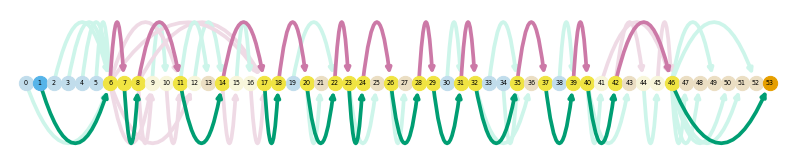

In [23]:
sg.plot_transcript_path(tid, indicate_novel=True)

In [4]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [9]:
sg.plot_each_transcript_in_gene('PI4KB', 'figures/pi4kb', indicate_novel=True)


Plotting 14 transcripts for ENSG00000143393.17
Saving transcript path graph for ENCODEHT000006801 as figures/pi4kb_novel_ENCODEHT000006801_path.png
Saving transcript path graph for ENST00000368872.5 as figures/pi4kb_novel_ENST00000368872.5_path.png
Saving transcript path graph for ENST00000368873.6 as figures/pi4kb_novel_ENST00000368873.6_path.png
Saving transcript path graph for ENST00000368874.8 as figures/pi4kb_novel_ENST00000368874.8_path.png
Saving transcript path graph for ENST00000368875.6 as figures/pi4kb_novel_ENST00000368875.6_path.png
Saving transcript path graph for ENST00000430800.5 as figures/pi4kb_novel_ENST00000430800.5_path.png
Saving transcript path graph for ENST00000438243.2 as figures/pi4kb_novel_ENST00000438243.2_path.png
Saving transcript path graph for ENST00000446339.1 as figures/pi4kb_novel_ENST00000446339.1_path.png
Saving transcript path graph for ENST00000455060.5 as figures/pi4kb_novel_ENST00000455060.5_path.png
Saving transcript path graph for ENST000004